In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [2]:
from scipy.io import loadmat
mat = loadmat(r'/Users/varunpatro/Desktop/OBEG/ammonia_grid.mat')

In [3]:
data = mat['nh4']


In [4]:
type(data)

numpy.ndarray

In [5]:
data.shape

(1, 1)

In [6]:
mdtype = data.dtype

In [7]:
ndata = {n: data[n][0, 0] for n in mdtype.names}


In [8]:
nh4_concs = (((ndata['res1p0'])[0,0])[0])

In [9]:
counts = (((ndata['res1p0'])[0,0])[1])

In [10]:
nh4_concs.shape

(360, 180, 102, 12)

In [11]:
months = [None] * 12

In [12]:
months

[None, None, None, None, None, None, None, None, None, None, None, None]

In [13]:
for i in range(12):
    months[i] = nh4_concs[:,:,:,i]

In [14]:
months[0].shape

(360, 180, 102)

In [15]:
month_counts = [None] * 12
for i in range(12):
    month_counts[i] = counts[:,:,:,i]

In [16]:
month_counts[0].shape

(360, 180, 102)

In [17]:
# building columns of data frame

lat_pts = np.linspace(-89.5,90.5,180,False)
lat_col = []

for i in range(360):
    lat_col.append(lat_pts)

In [18]:
lat_col = [item for sublist in lat_col for item in sublist]


In [19]:
len(lat_col)

64800

In [20]:
lon_pts = np.linspace(-179.5, 180.5, 360, False)
print(len(lon_pts))

360


In [21]:
lon_col = []

In [22]:
for i in range(360):
    for j in range(180):
        lon_col.append(lon_pts[i])

In [23]:
len(lon_col)

64800

In [24]:
df = pd.DataFrame({'lat':lat_col})

In [25]:
df['lon'] = lon_col

In [55]:
df.columns

Index(['lat', 'lon', 'geometry'], dtype='object')

In [41]:
months = np.array(months)

In [42]:
type(months)

numpy.ndarray

In [45]:
month_names = [None, None, None, None, None, None, None, None, None, None, None, None]

In [46]:
months.shape

(12, 360, 180, 102)

In [47]:
jan_depth_1 = months[0,:,:,0]

In [86]:
feb_depth_1 = months[1,:,:,0]
mar_depth_1 = months[0,:,:,0]
apr_depth_1 = months[0,:,:,0]
may_depth_1 = months[0,:,:,0]
jun_depth_1 = months[0,:,:,0]
jul_depth_1 = months[0,:,:,0]
aug_depth_1 = months[0,:,:,0]
sep_depth_1 = months[0,:,:,0]
octo_depth_1 = months[9,:,:,0]
nov_depth_1 = months[10,:,:,0]
dec_depth_1 = months[11,:,:,0]

In [87]:
mar_depth_1.shape

(360, 180)

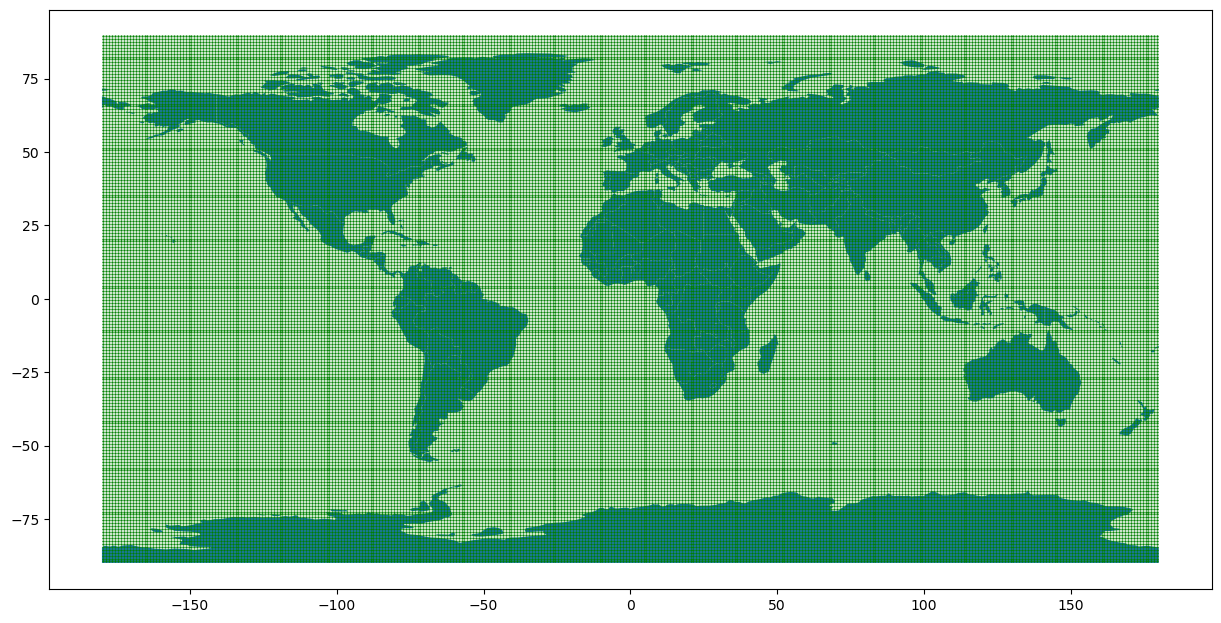

In [52]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (15,15)), marker = 'o', color = 'green', markersize = 0.5);

In [88]:
depth_1 = [jan_depth_1, feb_depth_1, mar_depth_1, apr_depth_1, may_depth_1, jun_depth_1, \
           jul_depth_1, aug_depth_1, sep_depth_1, octo_depth_1, nov_depth_1, dec_depth_1]

In [31]:
from mpl_toolkits.basemap import Basemap

In [28]:
# have the grid laid out, have the arrays, now just need to correctly map the array to the grid
# I can figure it out, just taking a bit longer than expected

In [ ]:
# write a universal plotting function that will take in coordinates and an array of concentrations
# plot at 250 m below surface ~ 25th depth band potentially

In [ ]:
# Next steps: Generating feature set 

# Creating the predictor script: m x n, m is number of observations, n is number of predictors
# find the indices of the ammonia that have observations (ones without Nan), save all indices
# reconstruction script to be added into directory in Poseidon

# To be done before machine learning: repeat data visualization with gridded scripts
# - ammonia vs temperature (scattered)
# - ammonia vs oxygen (scattered)

In [63]:
df

,lat,lon,geometry
0,-89.5,-179.5,POINT (-179.50000 -89.50000)
1,-88.5,-179.5,POINT (-179.50000 -88.50000)
2,-87.5,-179.5,POINT (-179.50000 -87.50000)
3,-86.5,-179.5,POINT (-179.50000 -86.50000)
4,-85.5,-179.5,POINT (-179.50000 -85.50000)
...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000)
64796,86.5,179.5,POINT (179.50000 86.50000)
64797,87.5,179.5,POINT (179.50000 87.50000)
64798,88.5,179.5,POINT (179.50000 88.50000)


In [90]:
jan_depth_1_flat = jan_depth_1.ravel()
feb_depth_1_flat = feb_depth_1.ravel()
mar_depth_1_flat = mar_depth_1.ravel()
apr_depth_1_flat = apr_depth_1.ravel()
may_depth_1_flat = may_depth_1.ravel()
jun_depth_1_flat = jun_depth_1.ravel()
jul_depth_1_flat = jul_depth_1.ravel()
aug_depth_1_flat = aug_depth_1.ravel()
sep_depth_1_flat = sep_depth_1.ravel()
octo_depth_1_flat = octo_depth_1.ravel()
nov_depth_1_flat = nov_depth_1.ravel()
dec_depth_1_flat = dec_depth_1.ravel()

In [92]:
feb_depth_1_flat

array([nan, nan, nan, ..., nan, nan, nan])

In [77]:
df['jan_depth_1'] = jan_depth_1_flat.tolist()

In [93]:
df['feb_depth_1'] = feb_depth_1_flat.tolist()
df['mar_depth_1'] = mar_depth_1_flat.tolist()
df['apr_depth_1'] = apr_depth_1_flat.tolist()
df['may_depth_1'] = may_depth_1_flat.tolist()
df['jun_depth_1'] = jun_depth_1_flat.tolist()
df['jul_depth_1'] = jul_depth_1_flat.tolist()
df['aug_depth_1'] = aug_depth_1_flat.tolist()
df['sep_depth_1'] = sep_depth_1_flat.tolist()
df['octo_depth_1'] = octo_depth_1_flat.tolist()
df['nov_depth_1'] = nov_depth_1_flat.tolist()
df['dec_depth_1'] = dec_depth_1_flat.tolist()

In [94]:
df

,lat,lon,geometry,jan_depth_1,feb_depth_1,mar_depth_1,apr_depth_1,may_depth_1,jun_depth_1,jul_depth_1,aug_depth_1,sep_depth_1,octo_depth_1,nov_depth_1,dec_depth_1
0,-89.5,-179.5,POINT (-179.50000 -89.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-88.5,-179.5,POINT (-179.50000 -88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-179.5,POINT (-179.50000 -87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-86.5,-179.5,POINT (-179.50000 -86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-85.5,-179.5,POINT (-179.50000 -85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64796,86.5,179.5,POINT (179.50000 86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64797,87.5,179.5,POINT (179.50000 87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64798,88.5,179.5,POINT (179.50000 88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
titles = ['Jan Depth 1', 'Feb Depth 1', 'Mar Depth 1', \
         'Apr Depth 1', 'May Depth 1', 'Jun Depth 1', \
         'Jul Depth 1', 'Aug Depth 1', 'Sep Depth 1', \
         'Oct Depth 1', 'Nov Depth 1', 'Dec Depth 1']



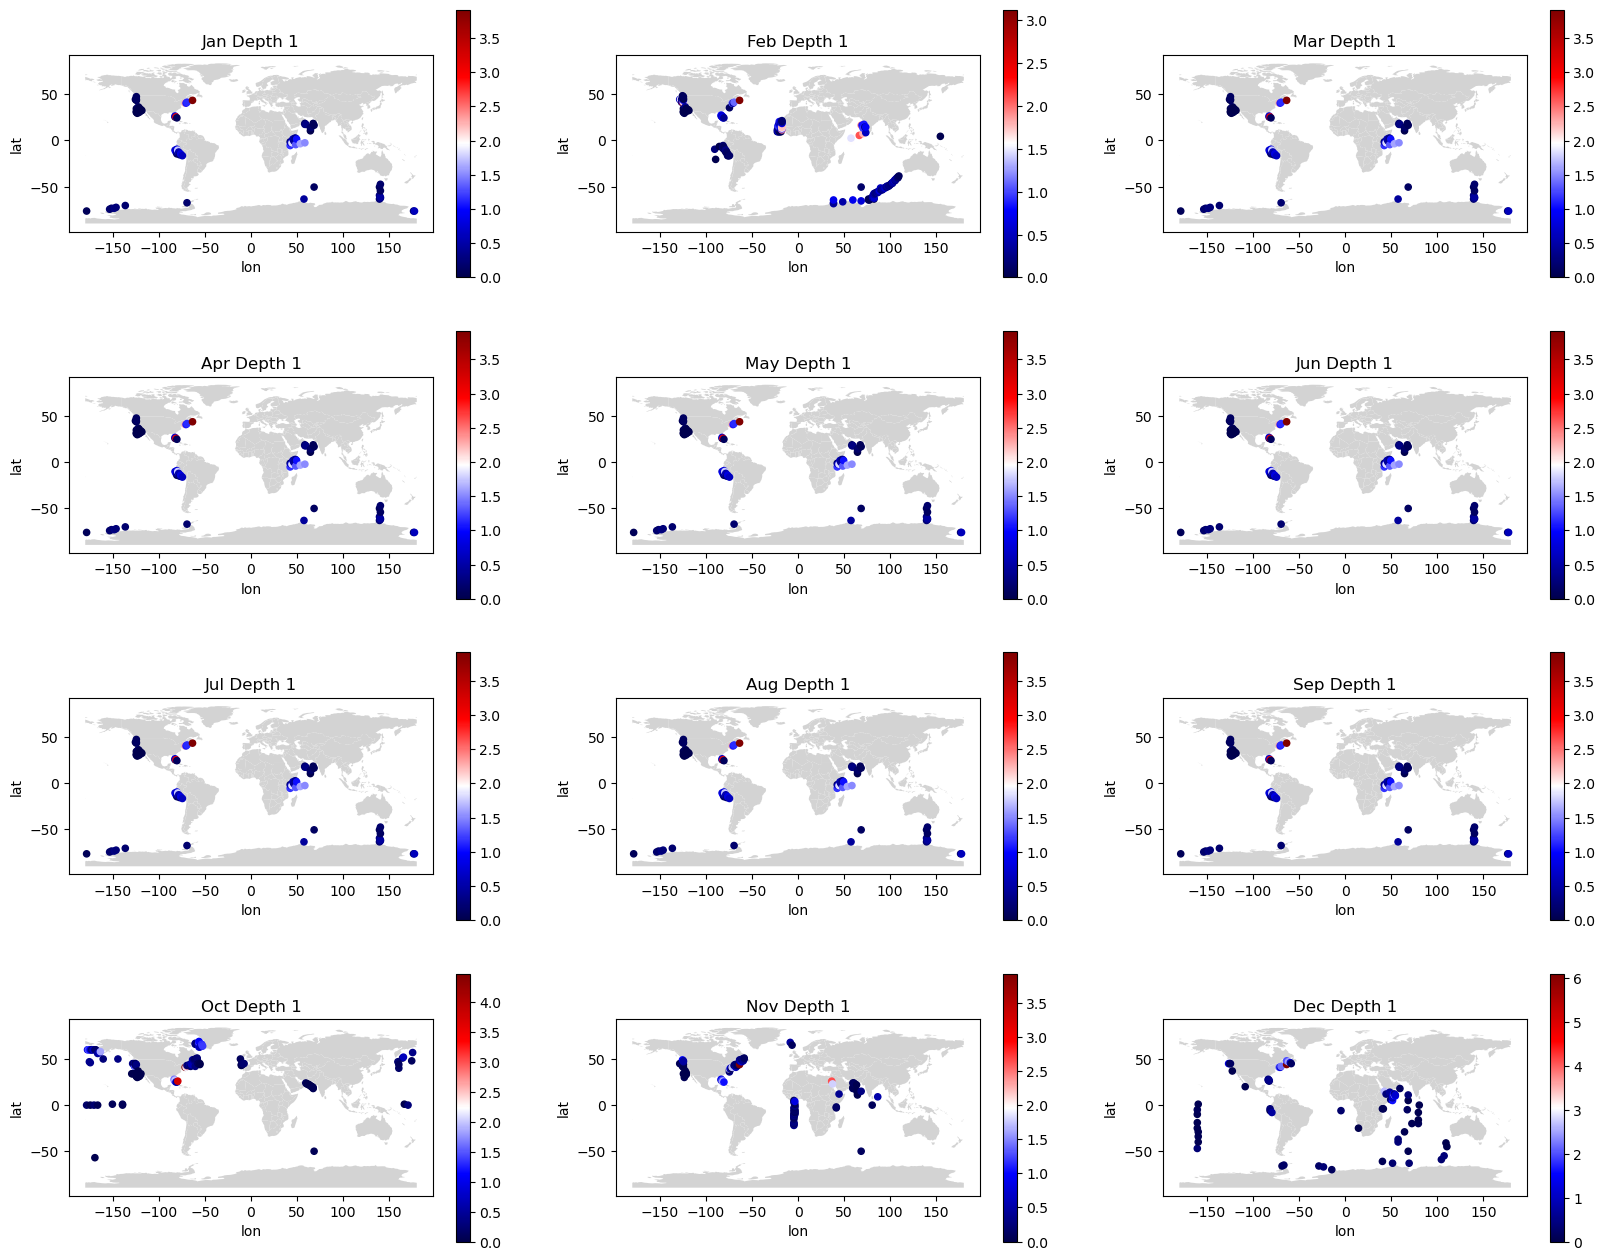

In [ ]:
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df.plot(x="lon", y="lat", kind="scatter", 
        c=df.iloc[:,i+3], colormap="seismic", 
        title= titles[i] , 
        ax=indices[i])
plt.show()